In [5]:
# - * - coding: utf-8 - * -
import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import warnings
warnings.filterwarnings("ignore")
import librosa.display

plt.figure(dpi=600) # 将显示的所有图分辨率调高
matplotlib.rc("font",family='SimHei') # 显示中文
matplotlib.rcParams['axes.unicode_minus']=False # 显示符号


def displayWaveform(file): # 显示语音时域波形
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    samples, sr = librosa.load(file, sr=16000)
    # samples = samples[6000:16000]

    print(len(samples), sr)
    time = np.arange(0, len(samples)) * (1.0 / sr)

    plt.plot(time, samples)
    plt.title("语音信号时域波形")
    plt.xlabel("时长（秒）")
    plt.ylabel("振幅")
    # plt.savefig("your dir\语音信号时域波形图", dpi=600)
    plt.show()

def displaySpectrum(file): # 显示语音频域谱线
    x, sr = librosa.load(file, sr=16000)
    print(len(x))
    # ft = librosa.stft(x)
    # magnitude = np.abs(ft)  # 对fft的结果直接取模（取绝对值），得到幅度magnitude
    # frequency = np.angle(ft)  # (0, 16000, 121632)

    ft = fft(x)
    print(len(ft), type(ft), np.max(ft), np.min(ft))
    magnitude = np.absolute(ft)  # 对fft的结果直接取模（取绝对值），得到幅度magnitude
    frequency = np.linspace(0, sr, len(magnitude))  # (0, 16000, 121632)

    print(len(magnitude), type(magnitude), np.max(magnitude), np.min(magnitude))
    print(len(frequency), type(frequency), np.max(frequency), np.min(frequency))

    # plot spectrum，限定[:40000]
    # plt.figure(figsize=(18, 8))
    plt.plot(frequency[:40000], magnitude[:40000])  # magnitude spectrum
    plt.title("语音信号频域谱线")
    plt.xlabel("频率（赫兹）")
    plt.ylabel("幅度")
    plt.show()

    # # plot spectrum，不限定 [对称]
    # plt.figure(figsize=(18, 8))
    # plt.plot(frequency, magnitude)  # magnitude spectrum
    # plt.title("语音信号频域谱线")
    # plt.xlabel("频率（赫兹）")
    # plt.ylabel("幅度")
    # plt.show()


def displaySpectrogram(file):
    x, sr = librosa.load(file, sr=16000)

    # compute power spectrogram with stft(short-time fourier transform):
    # 基于stft，计算power spectrogram
    spectrogram = librosa.amplitude_to_db(librosa.stft(x))

    # show
    librosa.display.specshow(spectrogram, y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('语音信号对数谱图')
    plt.xlabel('时长（秒）')
    plt.ylabel('频率（赫兹）')
    plt.show()


<Figure size 3840x2880 with 0 Axes>

1624800 16000


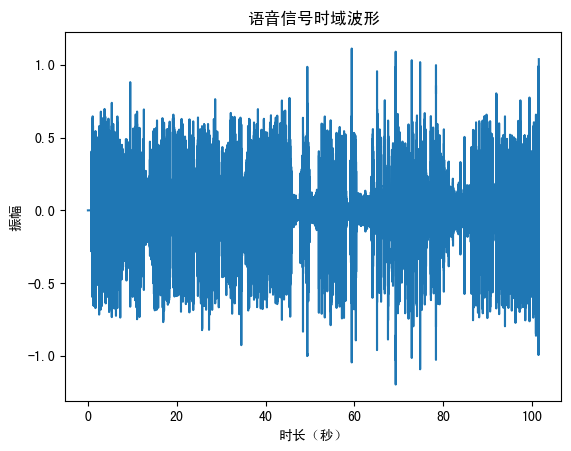

1624800
1624800 <class 'numpy.ndarray'> (1413.867+455.65878j) (-1438.6897-242.39578j)
1624800 <class 'numpy.ndarray'> 1485.4779 0.008100881
1624800 <class 'numpy.ndarray'> 16000.0 0.0


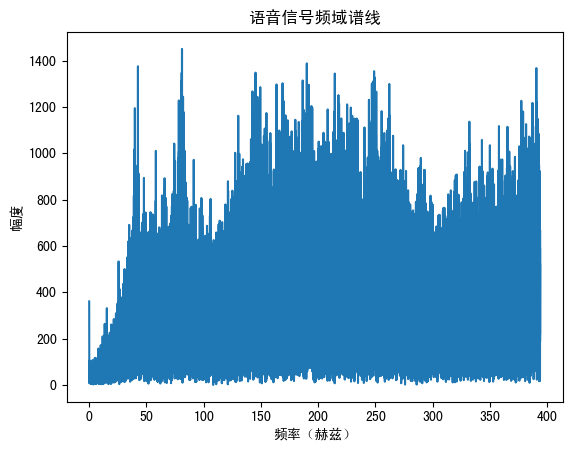

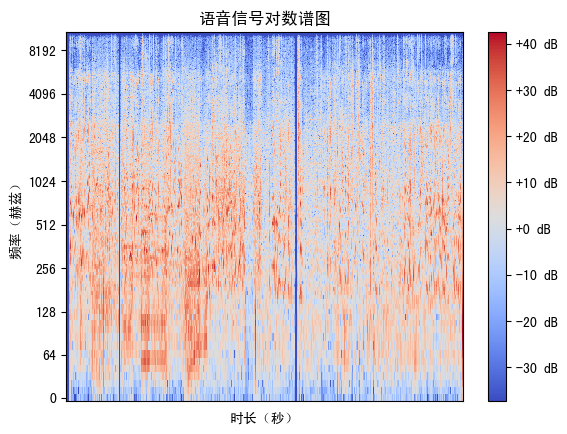

In [2]:
displayWaveform('test.wav')
displaySpectrum('test.wav')
displaySpectrogram('test.wav')

In [3]:
from moviepy.editor import *
video = VideoFileClip('./movie.mp4')
audio = video.audio
audio.write_audiofile('test.wav')
# audio.write_audiofile('test.mp3')

MoviePy - Writing audio in test.wav


MoviePy - Done.


1624800 16000


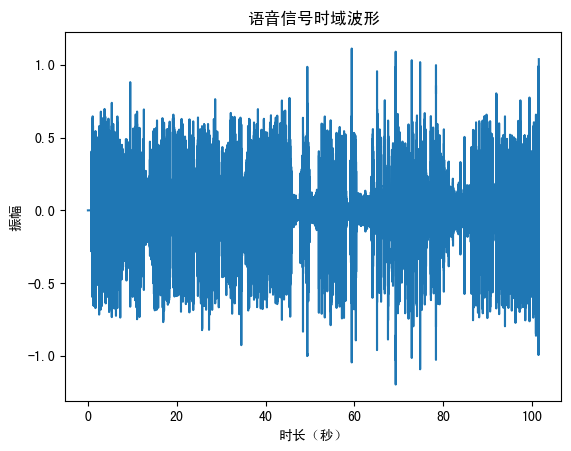

In [8]:
displayWaveform('test.wav')

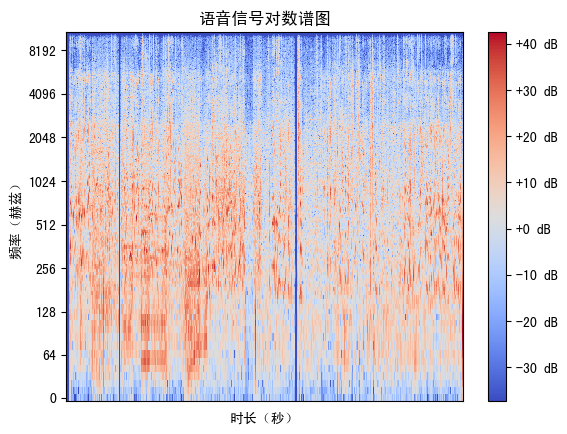

In [9]:
displaySpectrogram('test.wav')